Load the iris dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). 

# Clustering Algorithms (15P)

# 1.1 k-means
a) What are the advantages of k-means? (1P) 

Answer: Advantages of k-means are the fast convergence and the simple implementation.

b) Limitations of k-means 

 - How can you counteract that k-means depends on the initial conditions? (1P)

 Answer:  Since the algorithm is affected by the initialization of the centroid, you can repeat the algorithm multiple times.

- Why is k-means not optimal if you have class overlap? (1P) 

Answer: K-means has hard class assignments, and therefore it might be misleading if you have class overlap. 

- Consider this dataset. Why would k-means have problems detecting the classes? (1P) 

Answer: k-means would have problems in this case because it can only detect spherical clusters and the clusters in this dataset are non-spherical.

- Consider this dataset. Why would k-means have problems detecting the classes? Which other algorithm would be better to use in this case? (1P)

Answer: k-means would have problems in this case because of the outliers. Outliers heavily influence the cluster assignments in k-means. It would be best to use k-medoids instead, because it is less sensitive to outliers.

## 1.2. GMM – Gaussian Mixture Models for Classification (6P) 
  
  a) Explain the EM-Algorithm in your own words, without using any formula. (1P) 

  b) Describe how to avoid the problem of getting stuck in local minima when using the EM algorithm. Write a pseudo-algorithm (no coding needed) to describe how to find the best set of clusters AND to reduce the local minima problem.  (1P) 

  c) The complexity of the Gaussian mixture model can be controlled by restricting how the covariance matrices are allowed to vary. Assume your data has p features and you want to cluster it into k clusters. (3 points)   
  
  c.i) How many parameters (depending on the number of clusters)  eed to be estimated in the most general model (no restrictions on the  ovariances)? (1P) 

  c.ii) Assuming that there is no correlation between the variables for each Gaussian, how many parameters does this model need to estimate?  (1P) 

  c.iii)Assuming that there is neither correlation nor does the variation for each feature change. How many parameters does the model have to estimate now? (1P) 

  c.iv) Answer 3c.i)-3c.iii) with p=3, k=2. (1P) 

### 1.2a

**Why** do we need this algorithm?

As stated in the lecture, the problem is that model parameters (of the multivariate gaussians) need to be estimated, but the model depends on unobserved latent variables: Direct optimization of model parameters **AND** the unobserved variables (cluster assignment) is **NOT** possible.

**How** does EM work?

In essence, EM consists of 3 major steps:
1. initialization
2. expectation "E-step"
3. maximization "M-step"

The two last steps alternate until convergence.

The algorithm starts with the initial cluster assignment, which could be e.g. random initialization or via k-means. Then the parameters of each gaussian are estimated via ML. The following steps are then repeated until convergence. **E-Step:** Given the updated parameters, the datapoints are reassigned to their *expected* cluster assignments. **M-Step:** The best model parameters are re-computed with via ML. 



### 1.2b

The outcome of the EM algorithm is sensitive to the initialization. Hence, it might get stuck into local optima. To overcome this, different initializations need to be tried out.

Since this is only pseudocode there is no single perfect solution.

Steps to consider:
- iterate over number of clusters
  - iterate over different initializations
  - choose best among initalizations
- choose best among number of clusters

```python
random_state = 42 # optional, for reproducibility
n_clusters = … # set of clusters to be evaluated
n_init = … # number of tries for intialization
init_method = … # method used to initialize the weights, e.g. random or kmeans
data = … # your data for this unsupervised learning task
candidate_models = [] # store candidate models here, one per k
max_iter = ... # optional, max number of iterations
scores_k = dict.from_keys(n_clusters) # collect scores per cluster/initialization

for k in n_clusters:
	scores = [] # collect scores per initialization here
	for i in n_init:
		# instantiate the model with some initialization for k clusters
		model = gmm(k, init_method, random_state)
		# train the model for a while, say for up to max_iter EM-iterations
		model.fit(data, max_iter)
		# evaluate model performance for later comparision    
		score = model.loglik(data)
		scores.append(score)
		# save the best model, because we need it to compare scores across k
        # since we evaluation log-likelikhood, higher is better
		if score == max(scores):
			candidate_model = model
	# collect the best model from all initializations for later comparison
	candidate_models.append(candidate_model)
    # you might want to use this for reports later
    scores_k[k] = scores

# now compare all candidates, with AIC or BIC
aics = [candidate_models[i].eval(data) for i in candidate_models]

# the model with the lowest AIC / BIC is the best overall model across k
best_idx = aics == min(aics)
best_k = n_clusters[best_idx]
best_model = candidate_models[best_idx]

# print / plot results for reporting
# ...



```

### 1.2c

We need to consider one multivariate gaussian per cluster, thus:
- a covariance matrix per cluster
- a mean vector per cluster
- a weight per cluster
  - all weights sum up to 1

The covariance matrix is a symmetric matrix. For p parameters it has p x p elements.

#### 1.2c.i
```
from covariance: p*(p+1)/2
from mean vector: p
weight: k-1 # -1 because they sum up to 1
total: k * ( p*(p+1)/2 + p ) + (k-1)
```

#### 1.2c.ii
```
from covariance: p
total: k * (p+p) + (k-1)

```

#### 1.2c.iii
```
from covariance: 1
total: k * (1+p) + (k-1)

```


#### 1.2c.iv

|        | 2c.i  | 2c.ii | 2c.iii |
| ------ | -- | -- | --- |
| cov    | 6  | 3  | 1   |
| mean   | 3  | 3  | 3   |
| weight | 1  | 1  | 1   |
| **total**  | **19** | **13**  | **9**   |


# 1.3 Consensus Clustering and Non-Negative Matrix Factorization (4P)

a.	Consensus clustering is used to address statistical instability in clustering. Briefly explain in your own words the steps of implementing consensus clustering to a dataset using any clustering method, and how does it address statistical instability in clustering. (1P)

Solution:
-	Consensus clustering is similar to ensemble learning in supervised learning setting. It aggregates results from multiple clustering outcomes and “votes” for a final consensus result.
-	An example of implementing consensus clustering on Dataset A using K-Means is: choose a range of k values (number of clusters) and n times (number of experiment iterations). For each k cluster, take s subsamples (sample size) from Dataset A and run it through a K-Means model. Repeat subsampling and K-means for n times. Create a consensus matrix for each k cluster from the outcome of every n iteration (consensus matrix is properly normalized sum of all connectivity matrices). Choose the best consensus matrix of k (take the best consensus distribution), then we get the best k value for Dataset A. One of the ways to choose the best k value is to calculate the change in the area under the CDF and use the elbow method.
-	Consensus clustering addresses statistical instability by running a clustering model multiple times using different subsamples of data. With sampling variability, we can then use consensus matrix to calculate the stability of a cluster, providing information about the stability of overall clustering, stability of individual clusters, and cluster representatives and outliers.


b.	What is the main constraint of applying non-negative matrix factorization (NMF) as a clustering technique? How does the algorithm work in clustering data? (1P)

Solution:
-	NMF factorizes a data matrix X of N (rows) x M (columns) into two separate matrices W (N x k) and H (k x M). One important constraint is that the data matrices X can only have positive values (non-negative entries).
-	NMF clusters data by finding W and H, which are the low-rank approximation of X, with k is the number of clusters. The value of k has to be smaller than the maximum value of N and M (k << max(N, M)). The objective function of NMF is to minimize the generalized cost function, for example, KL divergence between X and dot product WxH. Using coordinate descent to alternate the calculation of w and h values, NMF decreases the value of the objective function by finding the local minimum of W and H. The outcome of NMF are W, H, and k.
-	KL divergence is a measure of how one probability distribution is different from the second. It measures relative entropy (measure of disorder/uncertainty), not to confuse it with the distance between two distributions. If two distributions are very different, the KL divergence value will be big. If distributions are similar, the KD value will be smaller. If both distributions are the same, the KLD value will be 0 (minimum).


c.	What are the advantages and drawbacks of NMF? (1P)

Solution:
-	Advantage: It performs clustering and feature selection at the same time.
-	Advantage: It is not distance based since it is using KL divergence as its cost function.
-	Drawback: Its outcome is prone to random initialization.
-	Drawback: It can only detect linearly separable clusters.
-	Drawback: It is computationally demanding.


d.	How does one choose the appropriate number of clusters for a model based on silhouette index? (1P)

Solution:
-	The value of Silhouette index indicates how strong or “clear-cut” the clustering is performed. 
-	A Silhouette index that falls between 0.75 to 1 indicates strong clustering of the data, and a Silhouette index that is less than 0.25 indicates no clustering. 
-	One should choose the k value that reflects the highest value of Silhouette index, best if it is 0.75 and above.

# Programming Task (10P)

In [ ]:
# import libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


In [ ]:
X, _ = load_iris(return_X_y=True, as_frame=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
X.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

# 2.1 Apply k-means clustering to the iris dataset


2.1 a Select the optimal number of clusters via BIC.  

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [ ]:
clusters = [i for i in range(2,10)]
random_state = 42

In [ ]:
# train one model per cluster size
cols = ["petal width (cm)","petal length (cm)"]
kmeans_models = [KMeans(n_clusters=n_clusters, random_state=random_state).fit(X[cols]) for n_clusters in clusters]
kmeans_models

[KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42)]

In [ ]:
# get best model from BIC
def get_bic(k, X):
    gmm = GaussianMixture(n_components=k, init_params='kmeans')
    gmm.fit(X)
    return gmm.bic(X)

bic = [get_bic(k=n_clusters, X=X[cols]) for n_clusters in clusters]
metrics = pd.DataFrame({"clusters":clusters,"bic":bic})
metrics["best"] = metrics["bic"] == min(metrics["bic"])
metrics

clusters         bic   best
0         2  364.579644  False
1         3  355.873392  False
2         4  371.097869  False
3         5  382.615369  False
4         6  408.653025  False
5         7  437.590294  False
6         8  246.598970   True
7         9  485.469299  False

In [ ]:
# Alternative answer with corrected BIC

def corrected_bic(k, X):
    gmm = GaussianMixture(n_components=k, init_params='kmeans')
    gmm.fit(X)
    return gmm._n_parameters() * np.log(X.shape[0]) -2 * gmm.score(X)

bic = [corrected_bic(k=n_clusters, X=X[cols]) for n_clusters in clusters]
metrics = pd.DataFrame({"clusters":clusters,"bic":bic})
metrics["best"] = metrics["bic"] == min(metrics["bic"])
metrics

clusters         bic   best
0         2   57.180073   True
1         3   86.985417  False
2         4  116.950300  False
3         5  146.909473  False
4         6  176.959522  False
5         7  206.989922  False
6         8  235.515236  False
7         9  265.514193  False

In [ ]:
print("Answer: The best number of clusters by BIC is k = 2")

Answer: The best number of clusters by BIC is k = 2


2.1 b For each clustering plot the cluster assignment within a scatter plot for the features “petal width” and “petal length”.

2.1 c For each clustering create silhouette plots and print out the score. You can make use of the sklearn library (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). 

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.7653904100951201
For n_clusters = 3 The average silhouette_score is : 0.6604800083354864
For n_clusters = 4 The average silhouette_score is : 0.6127580793146696
For n_clusters = 5 The average silhouette_score is : 0.5883732710500977
For n_clusters = 6 The average silhouette_score is : 0.5762928184593192
For n_clusters = 7 The average silhouette_score is : 0.5640984338329657
For n_clusters = 8 The average silhouette_score is : 0.590225562260211
For n_clusters = 9 The average silhouette_score is : 0.5708620582533953


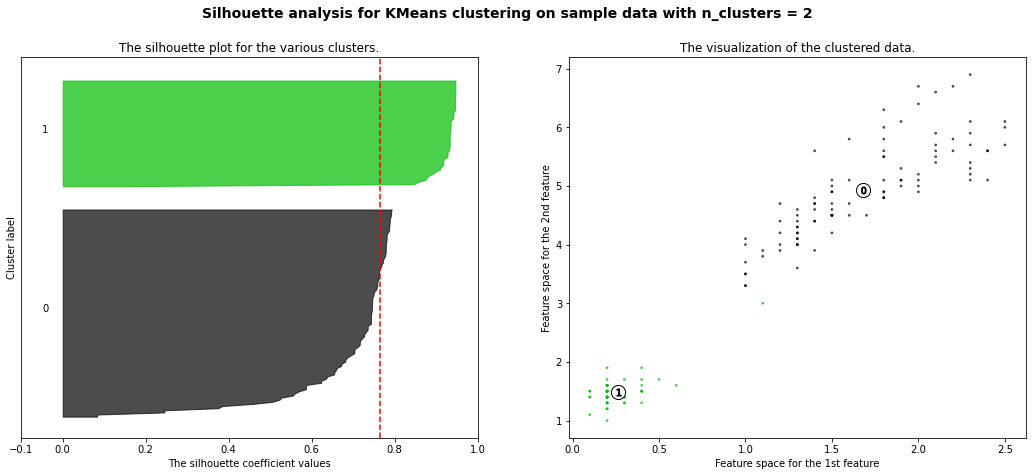

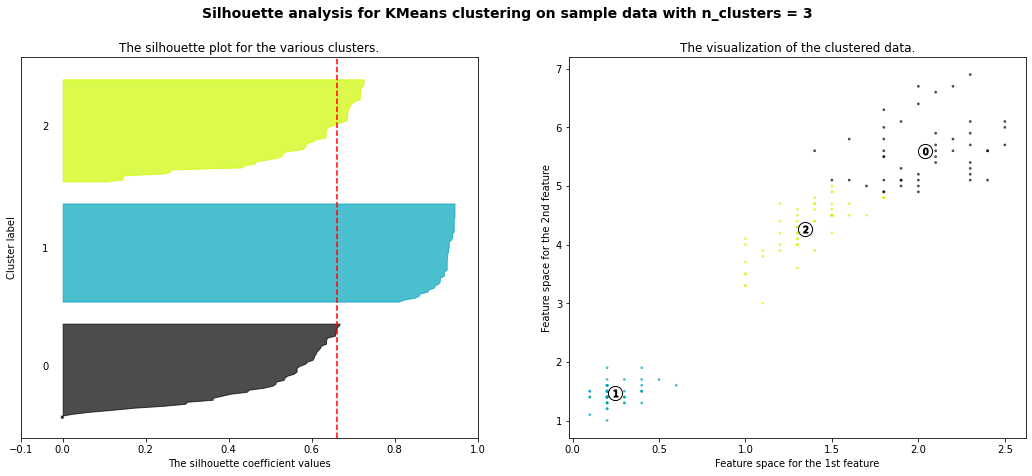

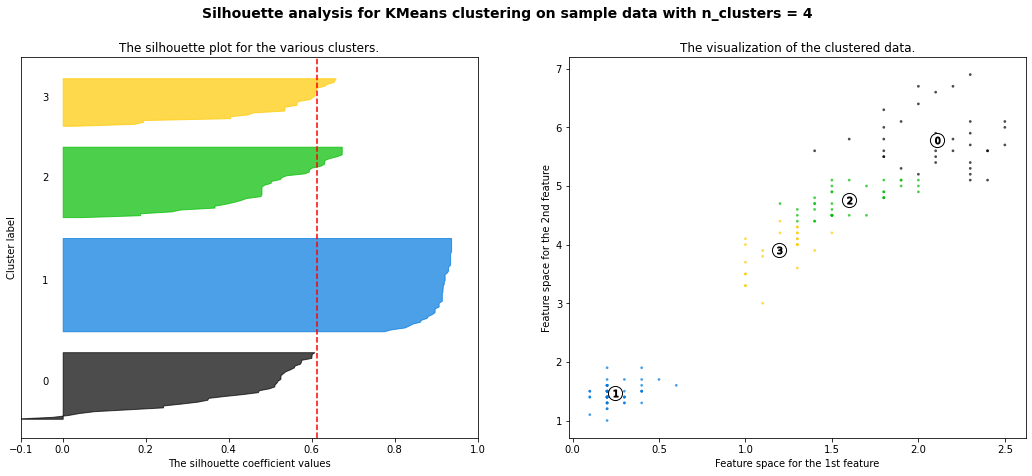

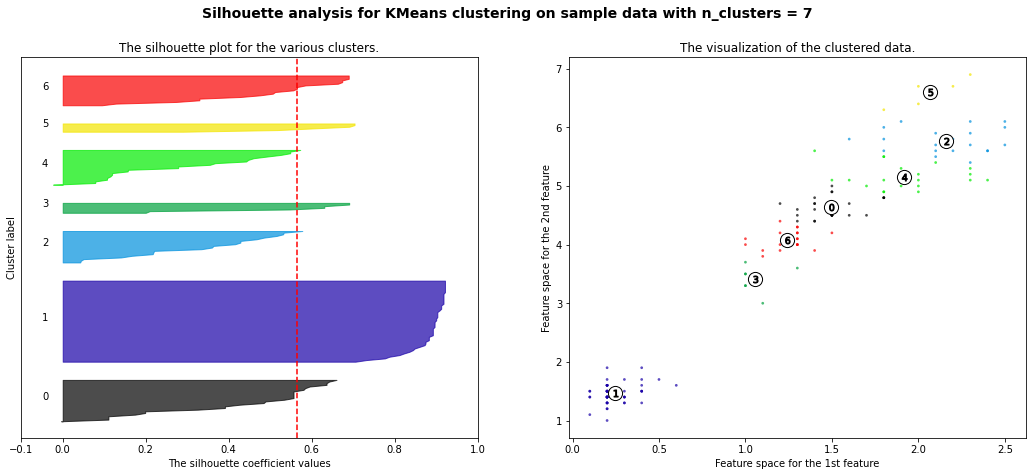

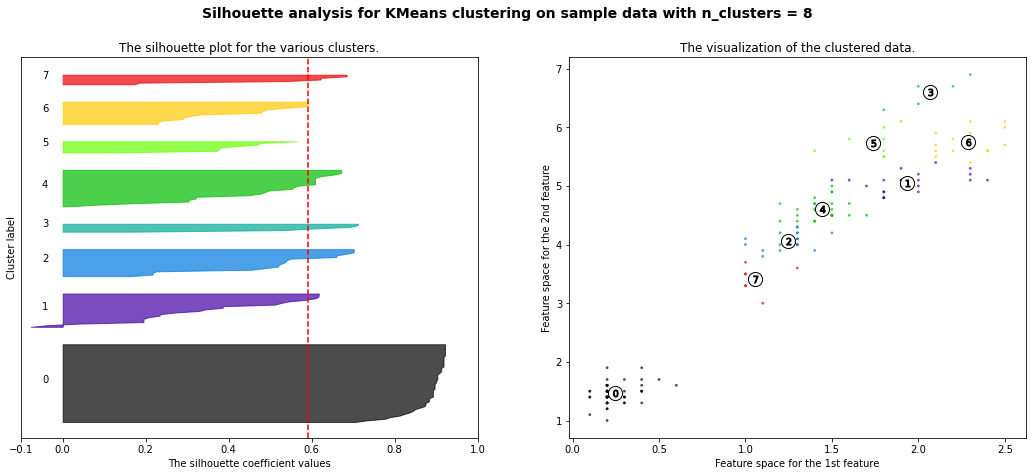

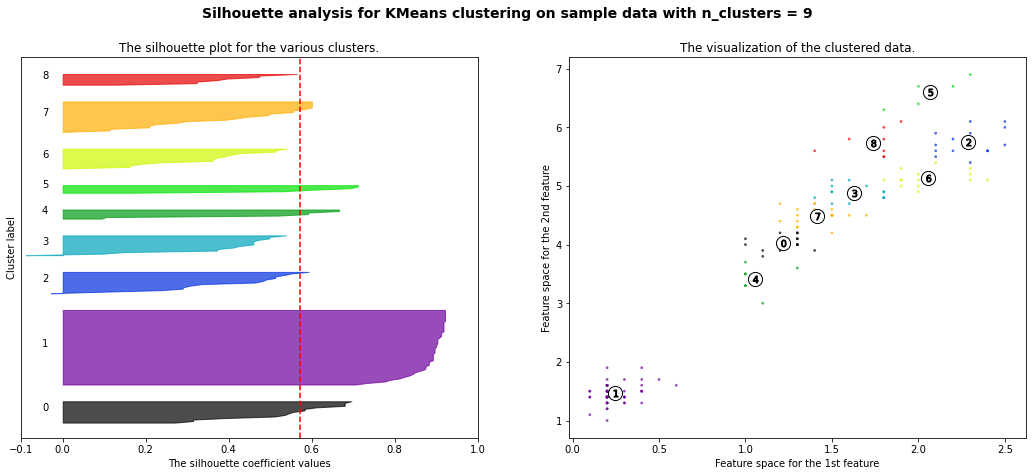

In [ ]:
for j, n_clusters in enumerate(clusters):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans_models[j].predict(X[cols])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X[cols], cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X[cols], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[cols[0]], X[cols[1]], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers =kmeans_models[j].cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## 2.2 Apply GMM clustering to the iris dataset. (3P) 

### 2.2.a

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture as GM

In [ ]:
clusters = [i for i in range(2,8)]
models = []
random_state = 42
n_init = 10

In [ ]:
# train one model per cluster size
cols = ["petal width (cm)","petal length (cm)"]
models = [GM(c, n_init=n_init, init_params="random", random_state=random_state).\
          fit(X[cols]) for c in clusters]
models

[GaussianMixture(init_params='random', n_components=2, n_init=10,
                 random_state=42),
 GaussianMixture(init_params='random', n_components=3, n_init=10,
                 random_state=42),
 GaussianMixture(init_params='random', n_components=4, n_init=10,
                 random_state=42),
 GaussianMixture(init_params='random', n_components=5, n_init=10,
                 random_state=42),
 GaussianMixture(init_params='random', n_components=6, n_init=10,
                 random_state=42),
 GaussianMixture(init_params='random', n_components=7, n_init=10,
                 random_state=42)]

In [ ]:
# get best model from BIC
bic = [model.bic(X[cols]) for model in models]
metrics = pd.DataFrame({"clusters":clusters,"bic":bic})
metrics["best"] = metrics["bic"] == min(metrics["bic"])
metrics


clusters         bic   best
0         2  364.579644  False
1         3  353.501255  False
2         4  366.865550  False
3         5  189.449838   True
4         6  212.580815  False
5         7  400.169872  False

In [ ]:
print(f"the optimal number of clusters is {metrics.clusters.loc[metrics.bic.argmin()]}.")

the optimal number of clusters is 5.


In [ ]:
# predict the cluster assignments
pred = [model.predict(X[cols]) for model in models]

### 2.2.b

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.7669465622459366
For n_clusters = 3 The average silhouette_score is : 0.41538251879888394
For n_clusters = 4 The average silhouette_score is : 0.36208909622898705
For n_clusters = 5 The average silhouette_score is : 0.06036439944496741
For n_clusters = 6 The average silhouette_score is : 0.08875521208115827
For n_clusters = 7 The average silhouette_score is : 0.13079963966127484


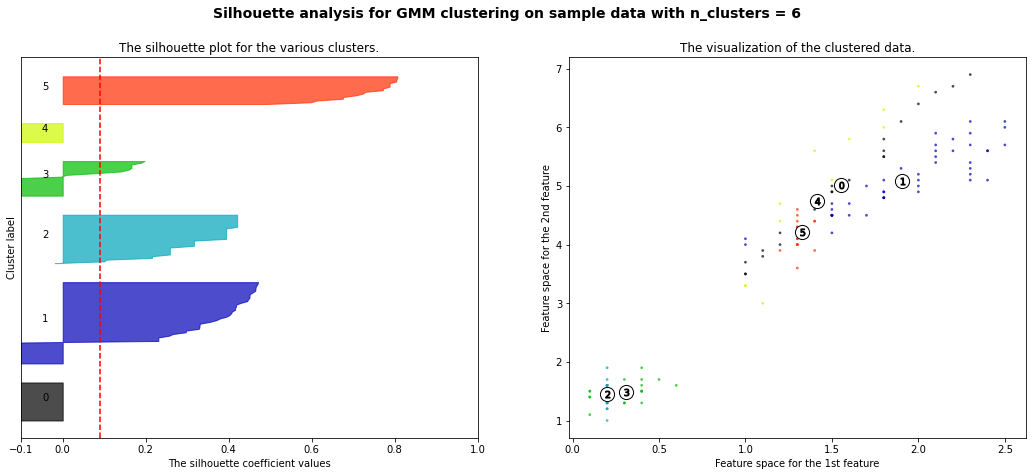

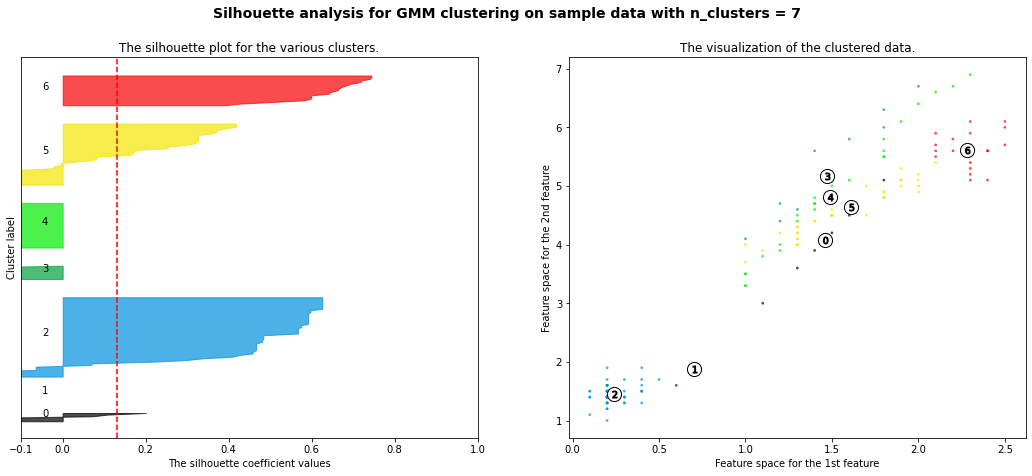

In [ ]:
for j, n_clusters in enumerate(clusters):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    # clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = models[j].predict(X[cols])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X[cols], cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X[cols], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[cols[0]], X[cols[1]], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers =models[j].means_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for GMM clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

The BIC recommends n = 5 clusters. In strong contrast, silhouette plots and scores clearly show, that the separation n = 2 is preferrable, and n = 5 would be the worst choice.

## 2.3 Compare your results of the different approaches and interpret them. Which of these methods is the best one to apply in this case? (1P) 

Answer: The silhouette scores of both clustering methods are similarly high for number of clusters k = 2. Yet the silhouette score of GMM is slightly higher than the one of the k-means clustering algorithm in this case and therefore, GMM would be the better option.

## 2.4. Perform consensus clustering on the Iris dataset using the functions of the consensusClustering.py file available at this repo: https://github.com/ZigaSajovic/Consensus_Clustering. Initialize it with parameters: cluster = Kmeans, number of clusters = 2 to 10, number of iterations = 5, and resample proportion = 80%. Find out from consensus clustering: the number of clusters that is found to be best for the dataset, changes in areas under CDF, and the best cluster from the consensus matrix assigned to each sample. (3P) 

In [ ]:
# import libraries

import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [ ]:
# load iris dataset

iris = load_iris()

In [ ]:
iris_data = iris.data

In [ ]:
iris_data.shape

(150, 4)

In [ ]:
# remember to download the script from the given GitHub repo: https://github.com/ZigaSajovic/Consensus_Clustering

import consensusClustering

In [ ]:
# initialize consensus clustering model

np.random.seed(42)
consensus_cluster = consensusClustering.ConsensusCluster(cluster=KMeans, L=2, K=11, H=5, resample_proportion=0.8)

In [ ]:
# fit model

change_cdf, best_cluster = consensus_cluster.fit(iris_data)

In [ ]:
# predict clusters

consensus_matrix = consensus_cluster.predict()

In [ ]:
# solution:

print(f"The number of clusters that is found to be best for the dataset: {best_cluster}")
print(f"Changes in areas under CDF: {change_cdf}")
print(f"The best cluster from the consensus matrix assigned to each sample: {consensus_matrix}")

The number of clusters that is found to be best for the dataset: 2
Changes in areas under CDF: [ 9.50968889e+00  4.22741862e-03  2.61160979e-03  2.73231509e-05
  9.09836066e-03 -2.49099721e-03  1.92720067e-03  2.98006068e-04]
The best cluster from the consensus matrix assigned to each sample: [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
